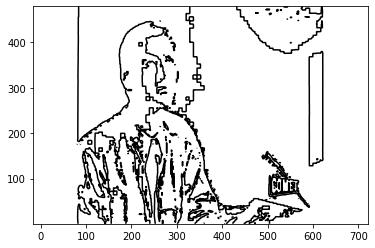

In [1]:
%matplotlib inline

from PIL import Image
from pylab import *

# read image to array
im = array(Image.open('/srv/godber/temp/xxoutput_4981.jpg').convert('L'))

# create a new figure
figure()

# show contours with origin upper left corner
contour(im, levels=[25], colors='black', origin='image')
axis('equal')

show()

In [2]:
import cv2


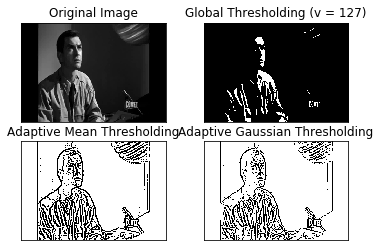

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/srv/godber/temp/xxoutput_4981.jpg',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

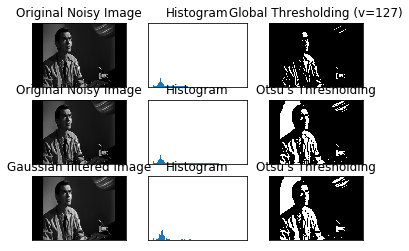

In [4]:
img = cv2.imread('/srv/godber/temp/xxoutput_4981.jpg',0)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

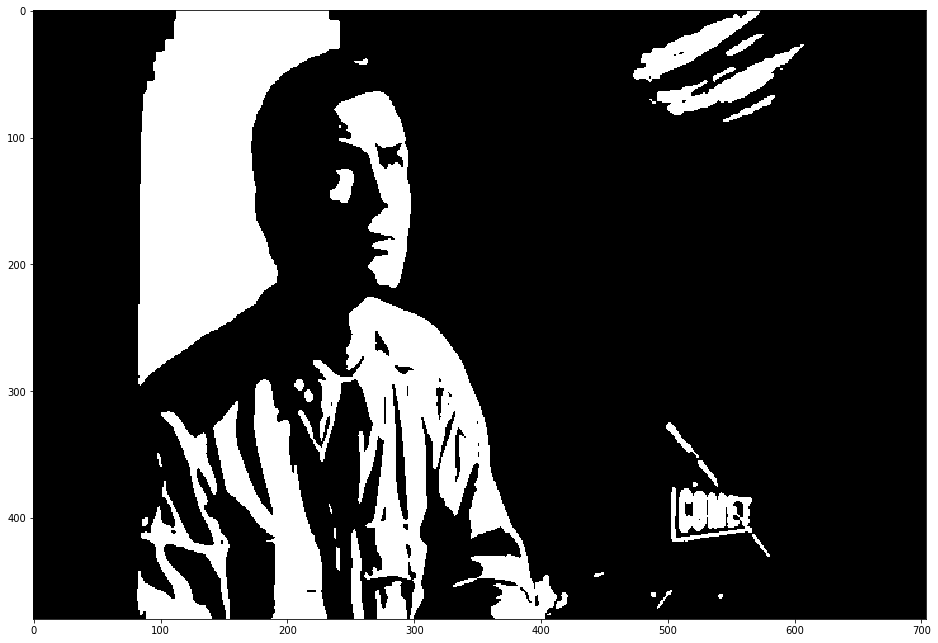

In [5]:
plt.figure(figsize=(16,12))
plt.imshow(th3, cmap='gray');

In [6]:
im2, contours, h = cv2.findContours(th3, 1, 2)

In [23]:
#x,y,w,h = cv2.boundingRect(contours[-1])
#img = cv2.rectangle(th3,(x,y),(x+w,y+h),(0,255,0),2)
img = th3

In [24]:
#plt.figure(figsize=(16,12))
#plt.imshow(img, cmap='gray');

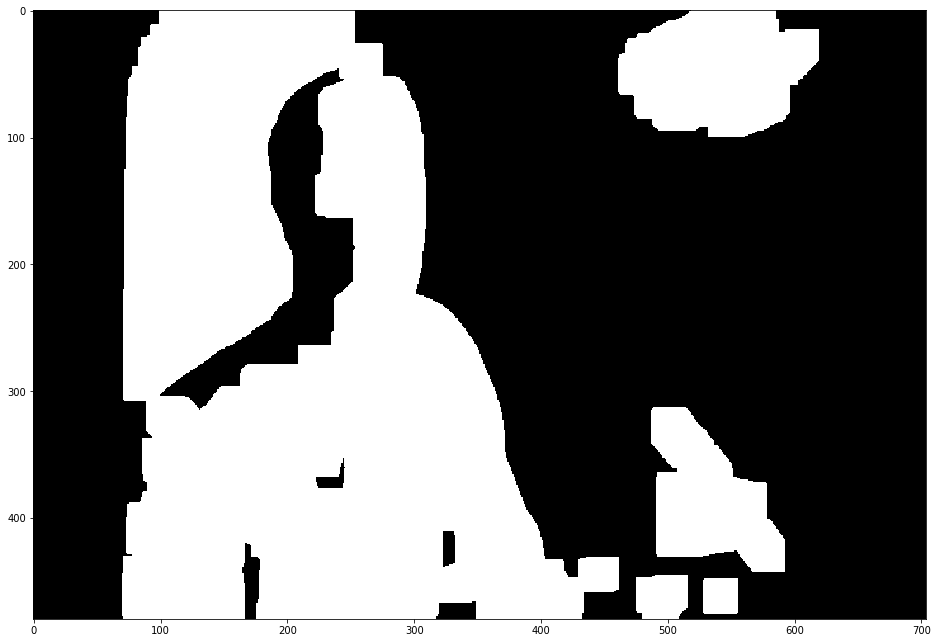

In [25]:
plt.figure(figsize=(16,12))
kernel = np.ones((25,25), np.uint8) 

plt.imshow(cv2.dilate(th3, kernel, iterations=1), cmap='gray');

In [26]:
d_th3 = cv2.dilate(th3, np.ones((25,25), np.uint8), iterations=1)

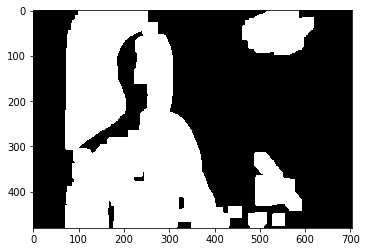

In [27]:
plt.imshow(d_th3, cmap='gray');

In [28]:
dth3_z, dth3_contours, dth3_h = cv2.findContours(d_th3, 1, 2)

In [29]:
dth3_z.shape

(480, 704)

In [30]:
for i, contour in enumerate(dth3_contours):
    print(cv2.contourArea(contour), i)

727.5 0
1271.0 1
297.0 2
265.5 3
8317.5 4
11420.5 5
11990.0 6
125869.5 7


In [31]:
# this is the index of the largest contour, which we will want to use to extract the 
# ORIGINAL 
index, contour = max(enumerate(map(cv2.contourArea, dth3_contours)), key=lambda item: item[1])
(index, contour)

(7, 125869.5)

In [32]:
largest_contour = dth3_contours[index]

In [36]:
mask = np.zeros_like(img) # Create mask where white is what we want, black otherwise
cv2.drawContours(mask, dth3_contours, index, 255, -1) # Draw filled contour in mask
out = np.zeros_like(img) # Extract out the object and place into output image
out[mask == 255] = img[mask == 255]

In [37]:
out[mask==255]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

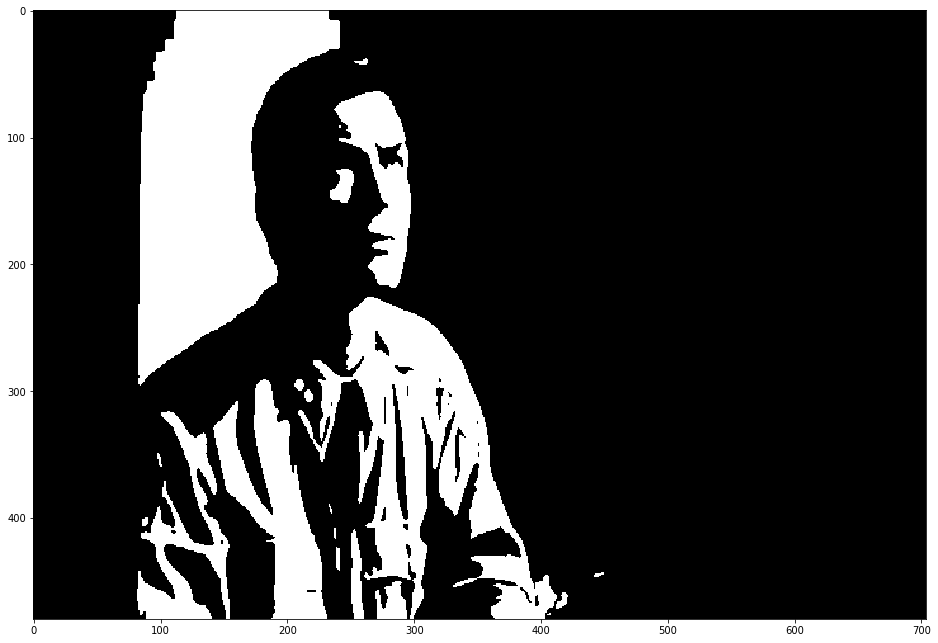

In [38]:
plt.figure(figsize=(16,12))
plt.imshow(out, cmap='gray');